In [ ]:
#!/usr/bin/env python
# -*- encoding: utf-8 -*-
'''
@文件        :025.Vista.ipynb
@说明        :
@时间        :2023/09/05 10:20:04
@作者        :Wu Baosheng
@版本        :1.0
'''

826


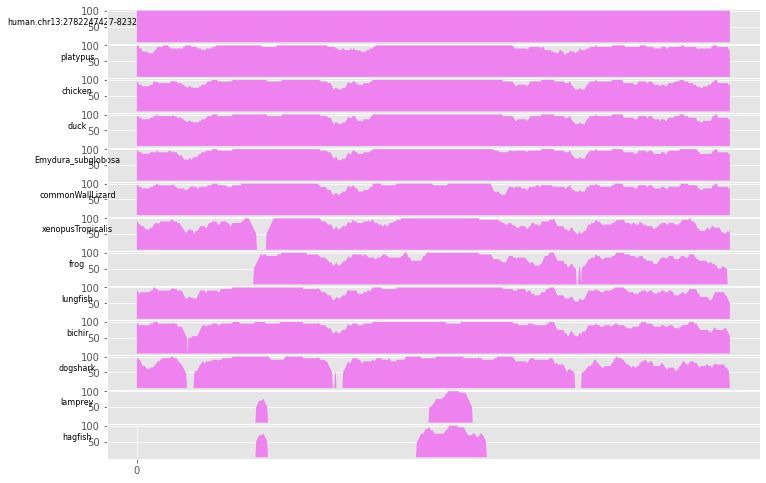

C:\Users\wubaosheng\AppData\Local\Temp\ipykernel_7940\361641920.py:108: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("./flt1.pdf",papertype = 'a4', orientation = 'portrait', format = 'pdf')


<Figure size 432x288 with 0 Axes>

In [2]:
# !/usr/bin/env python
# -*- coding: utf-8 -*-
# author : wubaosheng
# data: 2021/9/13 21:18
import os, sys, re
from Bio import SeqIO
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# plt.style.use('bmh')
plt.style.use('ggplot')
def transNumber(input_file = "H:/003.Endothermy/001.tuna/10.genome/03.CNE/02.tuna/mef2cb/mef2cb.fas",ref="hema"):
    """
    :param input_file:  the aligned fasta file
    :return: a datafram with 0 and 1
    """
    sequence_dir = {}
    transNumber_dir = {}
    with open(input_file,"r") as fs:
        outgroup = []
        seq_record = SeqIO.parse(fs,"fasta")
        for records in seq_record:
            sequence_dir[records.id]=str(records.seq)
        outgroup_dir = sequence_dir.copy()
        # del outgroup_dir[ref]
        length = max([len(sequence_dir[x]) for x in sequence_dir.keys()])
        ref_seq = sequence_dir[ref]
        for i in outgroup_dir:
            tmp = []
            for j in np.arange(length):
                # if ref_seq[j]=="-":
                #     pass
                if ref_seq[j]==outgroup_dir[i][j]:
                    tmp.append(1)
                else:
                    tmp.append(0)
            transNumber_dir[i] = tmp
        # df=pd.DataFrame(transNumber_dir)
        # print(df)
        # df=df[~(df[ref]==2)]
        # df.index=np.arange(df.shape[0])
    return transNumber_dir
def splitWind(data: dir,wind=20):
    stat_dir = {}
    for key in data:
        num_tmp = []
        for counter in np.arange(len(data[key])):
            if counter <wind:
                pass
            else:
                count_1 = data[key][counter-wind+1:counter+1].count(1)/wind *100
                if count_1<50:
                    num_tmp.append(0)
                else:
                    num_tmp.append(count_1)
                # num_tmp.append(count_1)
            stat_dir[key]=num_tmp
    return stat_dir
def readGFF(file='./refer.gff',wind=20):
    t=[]
    fs=open(file,'r').readlines()
    for line in fs:
        start=int(line.strip().split()[0])-wind
        end=int(line.strip().split()[1])-wind
        t.append([start,end])
    return t
if __name__ == '__main__':
    os.chdir("H:/002.singcell/01.liver/10.mutileSpecies/08.WGD/02.FLT4")
    number = transNumber(input_file = "flt1_CNE2.aln.fas",ref="human.chr13:2782247427-823255")
    count = splitWind(number,wind=20)
    print(len(number['human.chr13:2782247427-823255']))
    # exno=readGFF(file='./hox.gff',wind=10)
    x = [x for x in range(max([len(count[x]) for x in count.keys()]))]
    plt.figure(figsize = (11.69,8.27))
    # species_sorted = ['wohema', 'BelugaWhale','BlueWhale','SpermWhale','vaquita', 'Cow', 'Goat','Pig','Camel','Horse','Dog','Mouse', 'human']
    species_sorted = ['human.chr13:2782247427-823255','platypus','chicken','duck','Emydura_subglobosa','commonWallLizard','xenopusTropicalis','frog','lungfish','bichir','dogshark','lamprey',"hagfish"]
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0)   #####调整各个子图间的距离

    for index, species in enumerate(species_sorted):
        plt.subplot(len(species_sorted),1,index+1)
        plt.tick_params(direction='out')    ####设置刻度线的朝向（in,out, inout）
        plt.fill_between(x,count[species],facecolor = 'violet')
        ############################################# wheter to fill the exon region ################################################
        # for ex in exno:
        #     x1=np.arange(ex[0]-20,ex[1]-20)
        #     plt.fill_between(x1,count[species][ex[0]-20:ex[1]-20],facecolor = 'blue')
        # x1=range(2530,5092)
        # plt.fill_between(x1,count[species][2530:5092],facecolor = 'blue')
        # x2=range(19239,20761)
        # plt.fill_between(x2,count[species][19239:20761],facecolor = 'blue')
        # x3=range(25088,26807)
        # plt.fill_between(x3,count[species][25088:26807],facecolor = 'blue')
        # sns.lineplot(x,count[species],color="black")
        plt.yticks([50,100])  ####指定y轴上显示的刻度值
        plt.ylabel(species, color='black',fontsize=8,rotation=0)
        plt.xticks([])  #####关闭X轴的刻度
    plt.xticks(np.arange(0,len(x),5000))    #####最后在整个画板增加一个刻度
    # test1 = [x for x in  count["Mouse"] if x >0.7]
    # test2 = [x for x in  count["human"] if x >0.7]
    # plt.fill_between(x,count["Mouse"],0,facecolor = 'green')
    #  plt.fill_between(x,count["qiyu"],0,where = test2,facecolor = 'green')
    sns.color_palette("YlOrBr", as_cmap=True)
    plt.show()
    plt.savefig("./flt1_CNE.pdf",papertype = 'a4', orientation = 'portrait', format = 'pdf')
